In [1]:
import random
import numpy as np

In [2]:
import pandas as pd

In [3]:
# read data from file
# 

df = pd.read_csv('temperature.csv', header=None)
df.head(5)

0     1
0  2020-04-26T03:50:00  14.0
1  2020-03-10T05:00:00  14.0
2  2020-03-21T22:50:00  12.0
3  2020-03-17T13:20:00  16.0
4  2020-03-06T01:20:00  14.0

In [4]:
import matplotlib
%matplotlib inline

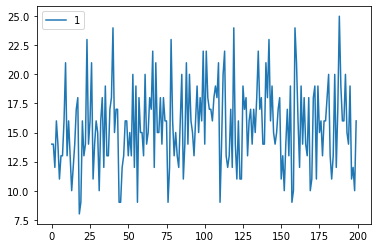

In [5]:
df[:200].plot()

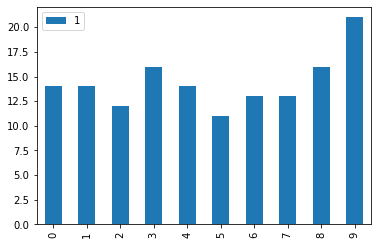

In [6]:
df[:10].plot(kind='bar')

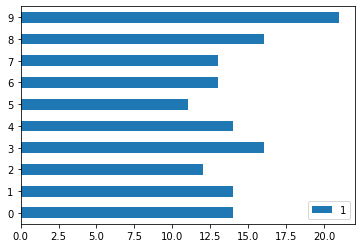

In [7]:
df[:10].plot(kind='barh')

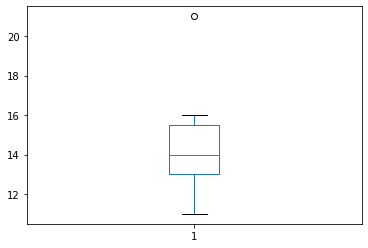

In [8]:
df[:10].plot(kind='box')

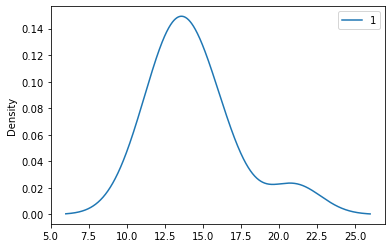

In [9]:
df[:10].plot(kind='kde')

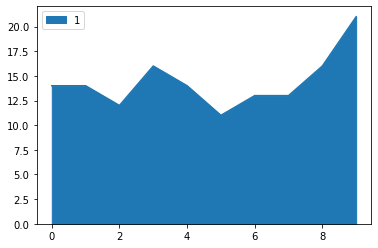

In [10]:
df[:10].plot(kind='area')

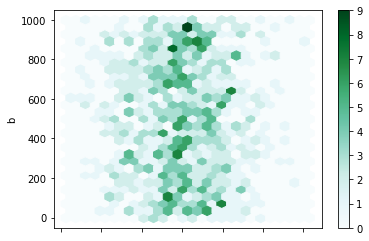

In [11]:
dfh = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
dfh['b'] = dfh['b'] + np.arange(1000)
dfh.plot.hexbin(x='a', y='b', gridsize=25)

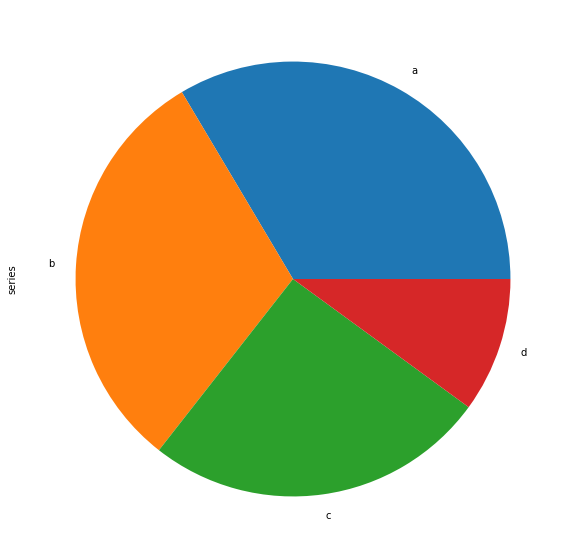

In [12]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series.plot(kind='pie', figsize=(10, 10))

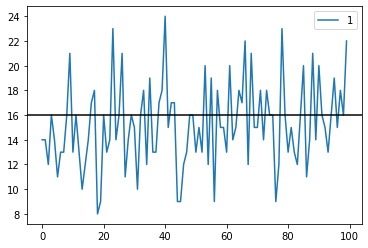

In [13]:
ax = df[:100].plot()
ax.axhline(16, color='black', linestyle='-')
# try to change position of line 
# try change color ( r or red, b or blue, ...)
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axhline.html

In [14]:
# Let's rename the columns to make human readable
df.columns = ['timestamp', 'temperature']
df.head(3)

timestamp  temperature
0  2020-04-26T03:50:00         14.0
1  2020-03-10T05:00:00         14.0
2  2020-03-21T22:50:00         12.0

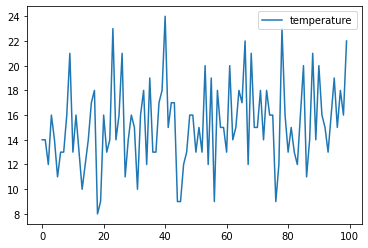

In [15]:
ax = df[:100].plot()

In [16]:
def to_fahrenheit(celsius):
    return (celsius * 9./5.) + 32.

In [17]:
# Test it on small part of Dataframe
df['temperature'].map(to_fahrenheit)[:5]

0    57.2
1    57.2
2    53.6
3    60.8
4    57.2
Name: temperature, dtype: float64

In [18]:
# Dataframe is not changed ...
df

timestamp  temperature
0     2020-04-26T03:50:00         14.0
1     2020-03-10T05:00:00         14.0
2     2020-03-21T22:50:00         12.0
3     2020-03-17T13:20:00         16.0
4     2020-03-06T01:20:00         14.0
...                   ...          ...
4352  2020-03-21T01:50:00         12.0
4353  2020-04-13T10:00:00         18.0
4354  2020-03-16T23:20:00         15.0
4355  2020-04-28T10:20:00         15.0
4356  2020-04-25T18:20:00         14.0

[4357 rows x 2 columns]

In [19]:
df['temperature'].map(to_fahrenheit)

0       57.2
1       57.2
2       53.6
3       60.8
4       57.2
        ... 
4352    53.6
4353    64.4
4354    59.0
4355    59.0
4356    57.2
Name: temperature, Length: 4357, dtype: float64

In [20]:
df['temperature F'] = df['temperature'].map(to_fahrenheit)
df.head(5)

timestamp  temperature  temperature F
0  2020-04-26T03:50:00         14.0           57.2
1  2020-03-10T05:00:00         14.0           57.2
2  2020-03-21T22:50:00         12.0           53.6
3  2020-03-17T13:20:00         16.0           60.8
4  2020-03-06T01:20:00         14.0           57.2

In [21]:
df['temperature F_v2'] = df['temperature'].apply(lambda x: (x * 9./5.) + 32.)
df.head()

timestamp  temperature  temperature F  temperature F_v2
0  2020-04-26T03:50:00         14.0           57.2              57.2
1  2020-03-10T05:00:00         14.0           57.2              57.2
2  2020-03-21T22:50:00         12.0           53.6              53.6
3  2020-03-17T13:20:00         16.0           60.8              60.8
4  2020-03-06T01:20:00         14.0           57.2              57.2

In [22]:
df['ruleoftumb'] = df['temperature F'] / df['temperature']
df.head()

timestamp  temperature  temperature F  temperature F_v2  \
0  2020-04-26T03:50:00         14.0           57.2              57.2   
1  2020-03-10T05:00:00         14.0           57.2              57.2   
2  2020-03-21T22:50:00         12.0           53.6              53.6   
3  2020-03-17T13:20:00         16.0           60.8              60.8   
4  2020-03-06T01:20:00         14.0           57.2              57.2   

   ruleoftumb  
0    4.085714  
1    4.085714  
2    4.466667  
3    3.800000  
4    4.085714

In [23]:
df['ruleoftumb'].describe()

count    4354.000000
mean        3.988127
std         0.709916
min         2.985185
25%         3.577778
50%         3.933333
75%         4.261538
max        17.800000
Name: ruleoftumb, dtype: float64

In [24]:
df.rename(columns={'ruleoftumb': 'bad_rule'}, inplace=True)
df.head()

timestamp  temperature  temperature F  temperature F_v2  bad_rule
0  2020-04-26T03:50:00         14.0           57.2              57.2  4.085714
1  2020-03-10T05:00:00         14.0           57.2              57.2  4.085714
2  2020-03-21T22:50:00         12.0           53.6              53.6  4.466667
3  2020-03-17T13:20:00         16.0           60.8              60.8  3.800000
4  2020-03-06T01:20:00         14.0           57.2              57.2  4.085714

In [25]:
df.drop('bad_rule', axis=1, inplace=True)
df.head()

# we also drop F_v2
df.drop('temperature F_v2', axis=1, inplace=True)

In [26]:
df.groupby('temperature').count()

timestamp  temperature F
temperature                          
2.0                  1              1
3.0                  8              8
4.0                  1              1
5.0                  6              6
6.0                  7              7
7.0                 25             25
8.0                 29             29
9.0                 69             69
10.0               143            143
11.0               233            233
12.0               242            242
13.0               454            454
14.0               552            552
15.0               464            464
16.0               503            503
17.0               368            368
18.0               371            371
19.0               240            240
20.0               233            233
21.0               134            134
22.0               120            120
23.0                74             74
24.0                39             39
25.0                23             23
26.0                 8              8
27.0                 7              7

In [66]:
df['deviation'] = df['temperature'] - df['temperature'].mean()
df.head()

timestamp  temperature  temperature F  \
timestamp                                                              
2020-04-26 05:50:00  2020-04-26T03:50:00         14.0           57.2   
2020-03-10 07:00:00  2020-03-10T05:00:00         14.0           57.2   
2020-03-22 00:50:00  2020-03-21T22:50:00         12.0           53.6   
2020-03-17 15:20:00  2020-03-17T13:20:00         16.0           60.8   
2020-03-06 03:20:00  2020-03-06T01:20:00         14.0           57.2   

                     deviation  weekday  weekend  
timestamp                                         
2020-04-26 05:50:00  -1.590951        6     True  
2020-03-10 07:00:00  -1.590951        1    False  
2020-03-22 00:50:00  -3.590951        5     True  
2020-03-17 15:20:00   0.409049        1    False  
2020-03-06 03:20:00  -1.590951        4    False

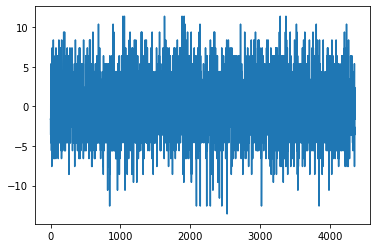

In [28]:
df['deviation'].plot()

In [29]:
# create TimeSeries Index
df.index = pd.to_datetime(df['timestamp'])

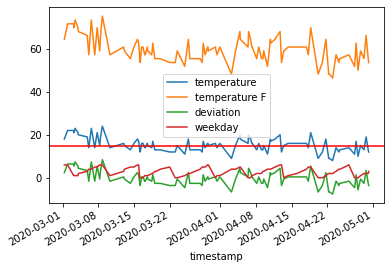

In [67]:
ax = df[:100].plot()
ax.axhline(df[:100]['temperature'].median(), color='r', linestyle='-')

In [68]:
df.head()

timestamp  temperature  temperature F  \
timestamp                                                              
2020-04-26 05:50:00  2020-04-26T03:50:00         14.0           57.2   
2020-03-10 07:00:00  2020-03-10T05:00:00         14.0           57.2   
2020-03-22 00:50:00  2020-03-21T22:50:00         12.0           53.6   
2020-03-17 15:20:00  2020-03-17T13:20:00         16.0           60.8   
2020-03-06 03:20:00  2020-03-06T01:20:00         14.0           57.2   

                     deviation  weekday  weekend  
timestamp                                         
2020-04-26 05:50:00  -1.590951        6     True  
2020-03-10 07:00:00  -1.590951        1    False  
2020-03-22 00:50:00  -3.590951        5     True  
2020-03-17 15:20:00   0.409049        1    False  
2020-03-06 03:20:00  -1.590951        4    False

In [69]:
df.index.view

<bound method Index.view of DatetimeIndex(['2020-04-26 05:50:00', '2020-03-10 07:00:00',
               '2020-03-22 00:50:00', '2020-03-17 15:20:00',
               '2020-03-06 03:20:00', '2020-04-27 08:50:00',
               '2020-03-25 23:50:00', '2020-03-14 07:20:00',
               '2020-04-14 07:20:00', '2020-03-03 04:50:00',
               ...
               '2020-03-22 12:00:00', '2020-04-10 18:20:00',
               '2020-03-14 17:50:00', '2020-04-05 06:00:00',
               '2020-04-29 04:50:00', '2020-03-21 03:50:00',
               '2020-04-13 12:00:00', '2020-03-17 01:20:00',
               '2020-04-28 12:20:00', '2020-04-25 20:20:00'],
              dtype='datetime64[ns]', name='timestamp', length=4354, freq=None)>

In [70]:
df.groupby(df.index.date).count()

timestamp  temperature  temperature F  deviation  weekday  weekend
2020-03-01         66           66             66         66       66       66
2020-03-02         72           72             72         72       72       72
2020-03-03         70           70             70         70       70       70
2020-03-04         72           72             72         72       72       72
2020-03-05         68           68             68         68       68       68
...               ...          ...            ...        ...      ...      ...
2020-04-27         72           72             72         72       72       72
2020-04-28         72           72             72         72       72       72
2020-04-29         72           72             72         72       72       72
2020-04-30         72           72             72         72       72       72
2020-05-01          6            6              6          6        6        6

[62 rows x 6 columns]

In [71]:
type(df)

pandas.core.frame.DataFrame

In [35]:
type(df['timestamp'])

pandas.core.series.Series

In [36]:
type(df['temperature'])

pandas.core.series.Series

In [37]:
df['timestamp'].describe()
# get info, text = object

count                    4357
unique                   4357
top       2020-04-28T14:50:00
freq                        1
Name: timestamp, dtype: object

In [72]:
df['temperature'].describe()
# get basic stats

count    4354.000000
mean       15.590951
std         3.596220
min         2.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        27.000000
Name: temperature, dtype: float64

In [73]:
df.describe(percentiles=[.1, .5, .6, .7])
# get basic stats

temperature  temperature F     deviation      weekday
count  4354.000000    4354.000000  4.354000e+03  4354.000000
mean     15.590951      60.063712  5.548565e-16     2.949012
std       3.596220       6.473197  3.596220e+00     2.015372
min       2.000000      35.600000 -1.359095e+01     0.000000
10%      11.000000      51.800000 -4.590951e+00     0.000000
50%      15.000000      59.000000 -5.909508e-01     3.000000
60%      16.000000      60.800000  4.090492e-01     4.000000
70%      17.000000      62.600000  1.409049e+00     4.000000
max      27.000000      80.600000  1.140905e+01     6.000000

In [74]:
df.describe(percentiles=[.1, .5, .6, .7], include=[np.float64])
# get basic stats

temperature  temperature F     deviation
count  4354.000000    4354.000000  4.354000e+03
mean     15.590951      60.063712  5.548565e-16
std       3.596220       6.473197  3.596220e+00
min       2.000000      35.600000 -1.359095e+01
10%      11.000000      51.800000 -4.590951e+00
50%      15.000000      59.000000 -5.909508e-01
60%      16.000000      60.800000  4.090492e-01
70%      17.000000      62.600000  1.409049e+00
max      27.000000      80.600000  1.140905e+01

In [75]:
df.dropna()['temperature'].describe()
# easy clean-up of data

count    4354.000000
mean       15.590951
std         3.596220
min         2.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        27.000000
Name: temperature, dtype: float64

In [76]:
df['temperature'].describe()
# caveat: inplace must be set explicitly

count    4354.000000
mean       15.590951
std         3.596220
min         2.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        27.000000
Name: temperature, dtype: float64

In [77]:
df[df['temperature'].isnull()]

Empty DataFrame
Columns: [timestamp, temperature, temperature F, deviation, weekday, weekend]
Index: []

In [78]:
df['temperature'].isnull()[2350:2357]

timestamp
2020-04-29 07:00:00    False
2020-03-10 14:00:00    False
2020-04-28 14:50:00    False
2020-03-05 03:00:00    False
2020-04-15 14:20:00    False
2020-03-27 02:20:00    False
2020-03-24 16:50:00    False
Name: temperature, dtype: bool

In [45]:
df['temperature'].isnull().any()

True

In [46]:
df.dropna()
df['temperature'].isnull().any()

True

In [47]:
df.dropna(inplace=True)
df['temperature'].isnull().any()

False

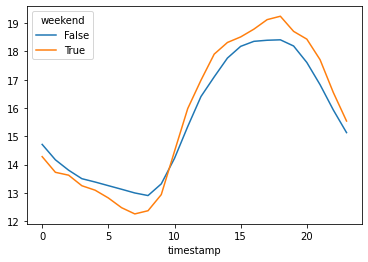

In [79]:
df['weekday'] = df.index.weekday
df['weekend'] = df['weekday'].isin({5, 6})
df.groupby(['weekend', df.index.hour])['temperature'].mean().unstack(level=0).plot()

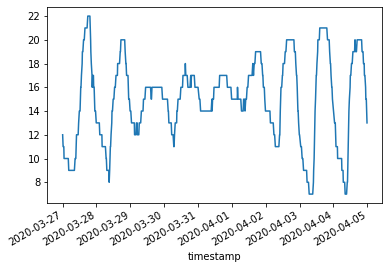

In [80]:
# selecting ranges
df["2020-03-27":"2020-04-4"]['temperature'].plot()

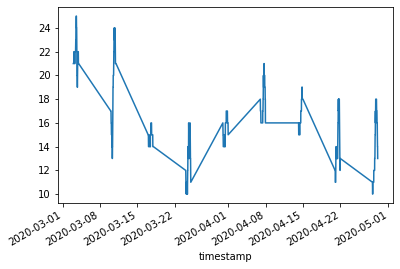

In [81]:
df[df.index.weekday == True]['temperature'].plot()

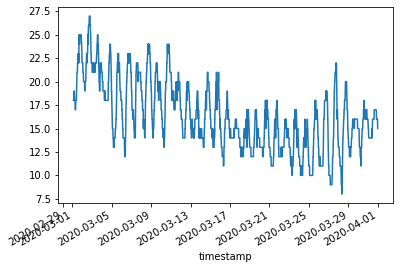

In [82]:
df['2020-03']['temperature'].plot()

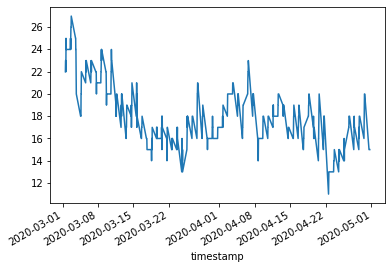

In [83]:
df[(df.index.hour > 12) & (df.index.hour <=16)]['temperature'].plot()

In [53]:
df.resample('D').max().head()

timestamp  temperature  temperature F  deviation  \
timestamp                                                                
2020-03-01  2020-03-01T23:50:00         25.0           77.0   9.409049   
2020-03-02  2020-03-02T23:50:00         27.0           80.6  11.409049   
2020-03-03  2020-03-03T23:50:00         25.0           77.0   9.409049   
2020-03-04  2020-03-04T23:50:00         24.0           75.2   8.409049   
2020-03-05  2020-03-05T23:50:00         23.0           73.4   7.409049   

            weekday  weekend  
timestamp                     
2020-03-01        6     True  
2020-03-02        0    False  
2020-03-03        1    False  
2020-03-04        2    False  
2020-03-05        3    False

In [54]:
df.resample('M').mean().head()

temperature  temperature F  deviation   weekday   weekend
timestamp                                                            
2020-03-31    16.436652      61.585973   0.845701  2.930769  0.291403
2020-04-30    14.719216      58.494590  -0.871734  2.967817  0.268190

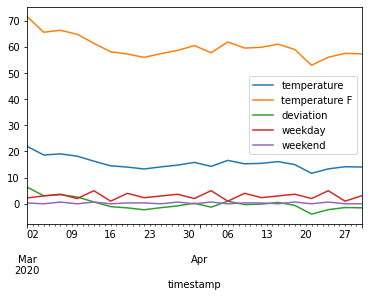

In [84]:
df.resample('3D').mean().plot()

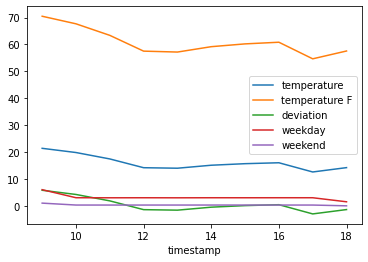

In [56]:
df.groupby(df.index.week).mean().plot()

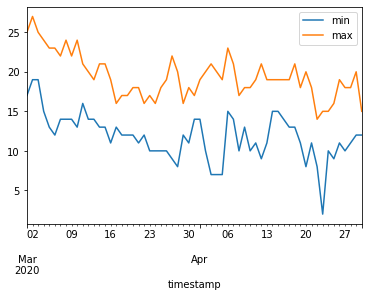

In [57]:
df['temperature'].resample('D').agg(['min', 'max']).plot()

In [58]:
new_index = df.index.shift(2, freq="H")
df.set_index(new_index, inplace=True)

In [59]:
df['temperature'][:2]

timestamp
2020-04-26 05:50:00    14.0
2020-03-10 07:00:00    14.0
Name: temperature, dtype: float64

In [85]:
import random
index = pd.date_range('1/1/2020', periods=1200, freq='S')
series = pd.Series([random.randint(0,100) for p in range(1200)], index=index)
series

2020-01-01 00:00:00     6
2020-01-01 00:00:01    50
2020-01-01 00:00:02    71
2020-01-01 00:00:03     0
2020-01-01 00:00:04    74
                       ..
2020-01-01 00:19:55     8
2020-01-01 00:19:56    35
2020-01-01 00:19:57    86
2020-01-01 00:19:58    72
2020-01-01 00:19:59     1
Freq: S, Length: 1200, dtype: int64

In [86]:
resampled = series.resample('5T', label='right', closed='right').mean()
resampled

2020-01-01 00:00:00     6.000000
2020-01-01 00:05:00    50.966667
2020-01-01 00:10:00    49.003333
2020-01-01 00:15:00    50.853333
2020-01-01 00:20:00    49.505017
Freq: 5T, dtype: float64

In [87]:
upsampled = resampled.resample('90S').mean()[:6]
upsampled

2020-01-01 00:00:00     6.000000
2020-01-01 00:01:30          NaN
2020-01-01 00:03:00          NaN
2020-01-01 00:04:30    50.966667
2020-01-01 00:06:00          NaN
2020-01-01 00:07:30          NaN
Freq: 90S, dtype: float64

In [88]:
upsampled = resampled.resample('90S').pad()[:6]
upsampled

2020-01-01 00:00:00     6.000000
2020-01-01 00:01:30     6.000000
2020-01-01 00:03:00     6.000000
2020-01-01 00:04:30     6.000000
2020-01-01 00:06:00    50.966667
2020-01-01 00:07:30    50.966667
Freq: 90S, dtype: float64

In [89]:
upsampled = resampled.resample('90S').bfill()[:6]
upsampled

2020-01-01 00:00:00     6.000000
2020-01-01 00:01:30    50.966667
2020-01-01 00:03:00    50.966667
2020-01-01 00:04:30    50.966667
2020-01-01 00:06:00    49.003333
2020-01-01 00:07:30    49.003333
Freq: 90S, dtype: float64

In [90]:
def myresmapler(*args, **kwargs):
    return random.randint(1, 100)

upsampled = resampled.resample('90S').apply(myresmapler)
upsampled

2020-01-01 00:00:00    84.0
2020-01-01 00:01:30    92.0
2020-01-01 00:03:00    74.0
2020-01-01 00:04:30    72.0
2020-01-01 00:06:00    84.0
2020-01-01 00:07:30    54.0
2020-01-01 00:09:00    45.0
2020-01-01 00:10:30    31.0
2020-01-01 00:12:00    34.0
2020-01-01 00:13:30    57.0
2020-01-01 00:15:00    33.0
2020-01-01 00:16:30    20.0
2020-01-01 00:18:00    30.0
2020-01-01 00:19:30    94.0
Freq: 90S, dtype: float64